In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import matplotlib.cm as cm
import re
sns.set_style("whitegrid")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('../input/fifa19/data.csv')
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Position']]
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Position
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,RF
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,ST
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,LW
3,De Gea,27,Spain,91,93,Manchester United,€72M,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,RCM
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,LF
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,RCM
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,RS
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,RCB
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,GK


In [4]:
# get remaining potential
df['Remaining Potential'] = df['Potential'] - df['Overall']

In [5]:
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Position,Remaining Potential
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,RF,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,ST,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,LW,1
3,De Gea,27,Spain,91,93,Manchester United,€72M,GK,2
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,RCM,1
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,LF,0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,RCM,0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,RS,0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,RCB,0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,GK,3


In [6]:
df['Unit'] = df['Value'].str[-1]
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
df['Value (M)'] = df['Value (M)'].astype(float)
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)

In [7]:
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Position,Remaining Potential,Unit,Value (M)
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,RF,0,M,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,ST,0,M,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,LW,1,M,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,GK,2,M,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,RCM,1,M,102.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,LF,0,M,93.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,RCM,0,M,67.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,RS,0,M,80.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,RCB,0,M,51.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,GK,3,M,68.0


Drop empty 'Unit' Column

In [8]:
df = df.drop('Unit', axis = 1)

In [9]:
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Position,Remaining Potential,Value (M)
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,RF,0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,ST,0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,LW,1,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,GK,2,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,RCM,1,102.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,LF,0,93.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,RCM,0,67.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,RS,0,80.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,RCB,0,51.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,GK,3,68.0


In [10]:
# 'ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM','RB', 'CF', 'RWB', 'LWB'

def get_best_squad(position):
    df_copy = df.copy()
    store = []
    for i in position:
        
        store.append([i,df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), df_copy[df_copy['Position'] == i]['Overall'].max(),df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False)])
       
        df_copy.drop(df_copy[df_copy['Position'] == i]['Overall'].idxmax(), inplace = True)
    #return store
    return pd.DataFrame(np.array(store).reshape(11,4), columns = ['Position', 'Player', 'Overall','Club']).to_string(index = False)

# 4-3-3
squad_433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position              Player Overall                  Club
      GK              De Gea      91     Manchester United
      LB             Marcelo      88           Real Madrid
      CB            D. Godín      90       Atlético Madrid
      CB           S. Umtiti      87          FC Barcelona
      RB         Azpilicueta      86               Chelsea
      LM       P. Aubameyang      88               Arsenal
     CDM     Sergio Busquets      89          FC Barcelona
      RM           K. Mbappé      88   Paris Saint-Germain
      LW           Neymar Jr      92   Paris Saint-Germain
      ST   Cristiano Ronaldo      94              Juventus
      RW      Bernardo Silva      86       Manchester City


In [11]:
# 3-5-2
squad_352 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']
print ('3-5-2')
print (get_best_squad(squad_352))

3-5-2
Position            Player Overall                       Club
      GK            De Gea      91          Manchester United
     LWB         N. Schulz      80        TSG 1899 Hoffenheim
      CB          D. Godín      90            Atlético Madrid
     RWB         M. Ginter      80   Borussia Mönchengladbach
      LM     P. Aubameyang      88                    Arsenal
     CDM   Sergio Busquets      89               FC Barcelona
     CAM      A. Griezmann      89            Atlético Madrid
      CM            Thiago      86          FC Bayern München
      RM         K. Mbappé      88        Paris Saint-Germain
      LW         Neymar Jr      92        Paris Saint-Germain
      RW    Bernardo Silva      86            Manchester City


Text(0.5, 1.0, 'Average Rating by Age')

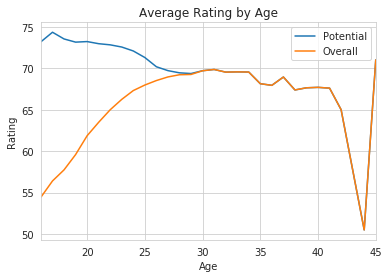

In [12]:
df_p = df.groupby(['Age'])['Potential'].mean()
df_o = df.groupby(['Age'])['Overall'].mean()

df_summary = pd.concat([df_p, df_o], axis=1)

ax = df_summary.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')

In [13]:
df.fillna('',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 10 columns):
Name                   18207 non-null object
Age                    18207 non-null int64
Nationality            18207 non-null object
Overall                18207 non-null int64
Potential              18207 non-null int64
Club                   18207 non-null object
Value                  18207 non-null object
Position               18207 non-null object
Remaining Potential    18207 non-null int64
Value (M)              18207 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.4+ MB


In [15]:
def get_best_squads(position, club = '*', measurement = 'Overall'):
    df_copy = df.copy()
    df_copy = df_copy[df_copy['Club'] == club]
    store = []
    for i in position:
        store.append([df_copy.loc[[df_copy[df_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
                      df_copy.loc[[df_copy[df_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False),
                      df_copy[df_copy['Position'].str.contains(i)][measurement].max(), 
                      float(df_copy.loc[[df_copy[df_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value (M)'].to_string(index = False))])
        df_copy.drop(df_copy[df_copy['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store]).round(1),pd.DataFrame(np.array(store).reshape(11,4), columns = ['Position', 'Player', measurement, 'Value (M)']).to_string(index = False),np.sum([x[3] for x in store]).round(1)

# easier constraint
squad_433_adj = ['GK', 'B$', 'B$', 'B$', 'B$', 'M$', 'M$', 'M$', 'W$|T$', 'W$|T$', 'W$|T$']

# Example Output for Chelsea
rating_433_Chelsea_Overall, best_list_433_Chelsea_Overall, value_433_Chelsea_Overall = get_best_squads(squad_433_adj, 'Chelsea', 'Overall')
rating_433_Chelsea_Potential, best_list_433_Chelsea_Potential, value_433_Chelsea_Potential  = get_best_squads(squad_433_adj, 'Chelsea', 'Potential')

print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_Chelsea_Overall))
print('Total Value (M): {:.1f}'.format(value_433_Chelsea_Overall))
print(best_list_433_Chelsea_Overall)

print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_Chelsea_Potential))
print('Total Value (M): {:.1f}'.format(value_433_Chelsea_Potential))
print(best_list_433_Chelsea_Potential)


-Overall-
Average rating: 83.7
Total Value (M): 343.5
Position          Player Overall Value (M)
      GK            Kepa      83      28.5
      RB     Azpilicueta      86      35.0
      LB   Marcos Alonso      83      24.0
     LCB      David Luiz      83      17.5
      CB      A. Rüdiger      82      22.5
     LDM        N. Kanté      89      63.0
      CM        Jorginho      84      38.0
     LCM      M. Kovačić      83      35.0
      RW         Willian      84      30.5
      ST          Morata      82      28.5
      RW           Pedro      82      21.0
-Potential-
Average rating: 86.8
Total Value (M): 330.0
Position           Player Potential Value (M)
      GK             Kepa        91      28.5
     LCB   A. Christensen        88      21.5
      RB      Azpilicueta        86      35.0
      LB    Marcos Alonso        84      24.0
      CB       A. Rüdiger        84      22.5
     LDM         N. Kanté        90      63.0
     LCM       M. Kovačić        89      35.0
      

In [16]:
# very easy constraint since some club do not have strict squad
squad_352_adj = ['GK', 'B$', 'B$', 'B$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'W$|T$|M$', 'W$|T$|M$']

By_club = df.groupby(['Club'])['Overall'].mean()

def get_summary(squad):
    OP = []
    # only get top 100 clubs for shorter run-time
    for i in By_club.sort_values(ascending = False).index[0:100]:
        # for overall rating
        O_temp_rating, _, _  = get_best_squads(squad, club = i, measurement = 'Overall')
        # for potential rating & corresponding value
        P_temp_rating, _, P_temp_value = get_best_squads(squad, club = i, measurement = 'Potential')
        OP.append([i, O_temp_rating, P_temp_rating, P_temp_value])
    return OP


OP_df = pd.DataFrame(np.array(get_summary(squad_352_adj)).reshape(-1,4), columns = ['Club', 'Overall', 'Potential', 'Value of highest Potential squad'])
OP_df.set_index('Club', inplace = True)
OP_df = OP_df.astype(float)    

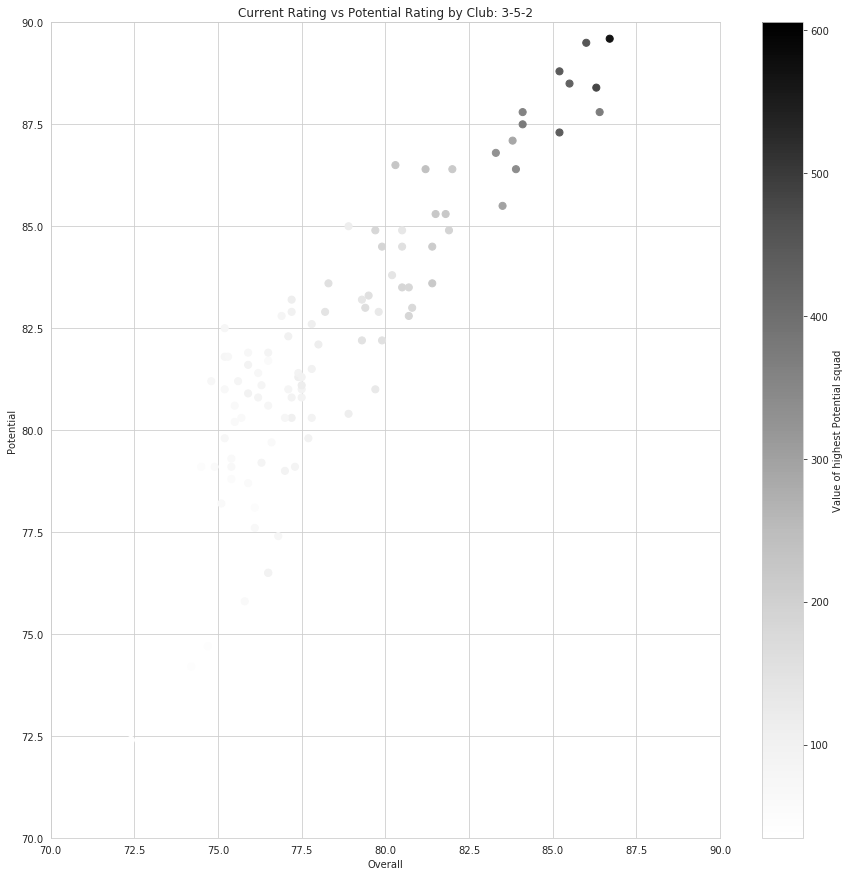

In [17]:
fig, ax = plt.subplots()
OP_df.plot(kind = 'scatter', x = 'Overall', y = 'Potential', c = 'Value of highest Potential squad', 
           s = 50, figsize = (15,15), xlim = (70, 90), ylim = (70, 90),
           title = 'Current Rating vs Potential Rating by Club: 3-5-2', ax = ax)


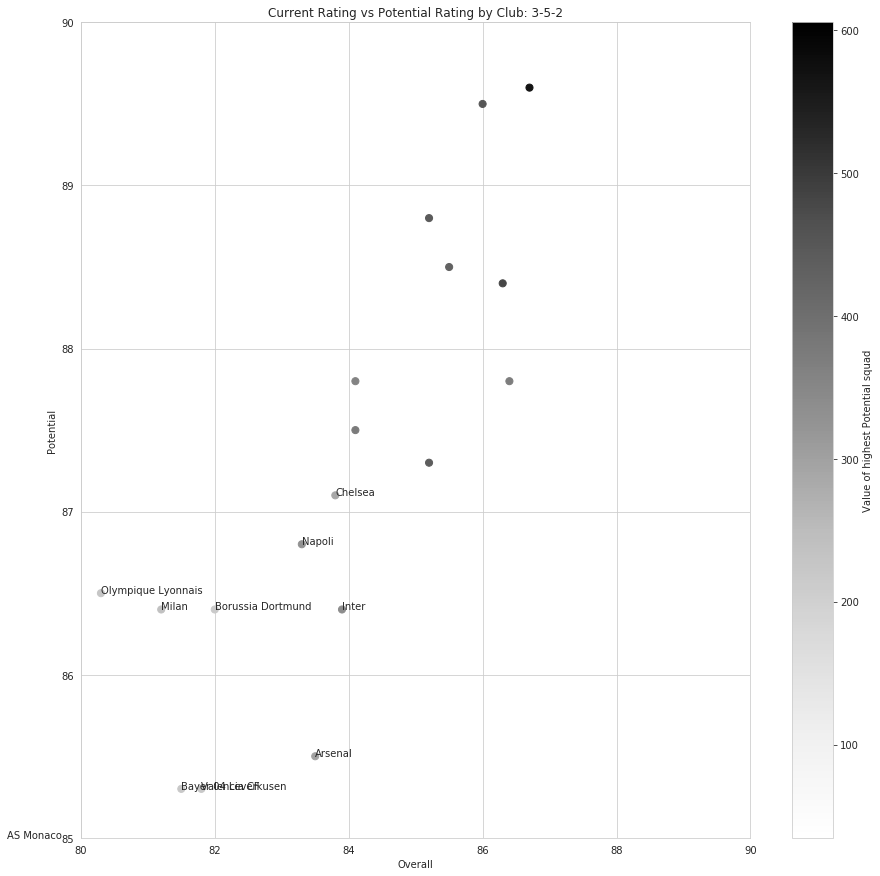

In [18]:
fig, ax = plt.subplots()
OP_df.plot(kind = 'scatter', x = 'Overall', y = 'Potential', c = 'Value of highest Potential squad',
           s = 50, figsize = (15,15), xlim = (80, 90), ylim = (85, 90),
           title = 'Current Rating vs Potential Rating by Club: 3-5-2', ax = ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

OP_df['Club_label'] = OP_df.index
        
OP_df_sub = OP_df[(OP_df['Potential']>=85) & (OP_df['Value of highest Potential squad']<=350)]

label_point(OP_df_sub['Overall'], OP_df_sub['Potential'], OP_df_sub['Club_label'], ax)

In [19]:
squad_352_adj = ['GK', 'B$', 'B$', 'B$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'W$|T$|M$', 'W$|T$|M$']

rating_352_TH_Overall, best_list_352_TH_Overall, value_352_TH_Overall = get_best_squads(squad_352_adj, 
                                                                                        'Tottenham Hotspur',
                                                                                        'Overall')
rating_352_TH_Potential, best_list_352_TH_Potential, value_352_TH_Potential  = get_best_squads(squad_352_adj,
                                                                                               'Tottenham Hotspur',
                                                                                               'Potential')
print('Tottenham Hotspur')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_352_TH_Overall))
print('Total Value (M): {:.1f}'.format(value_352_TH_Overall))
print(best_list_352_TH_Overall)

print('-Potential-')
print('Average rating: {:.1f}'.format(rating_352_TH_Potential))
print('Total Value (M): {:.1f}'.format(value_352_TH_Potential))
print(best_list_352_TH_Potential)


Tottenham Hotspur
-Overall-
Average rating: 85.2
Total Value (M): 455.5
Position            Player Overall Value (M)
      GK         H. Lloris      88      36.0
     LCB     J. Vertonghen      87      34.0
     RCB   T. Alderweireld      86      39.0
     RCB        D. Sánchez      84      34.0
      ST           H. Kane      89      83.5
     CAM        C. Eriksen      88      73.5
     LCM           D. Alli      84      42.5
      LM            H. Son      84      37.0
      RM       Lucas Moura      83      31.0
      CM        M. Dembélé      83      24.0
      RM         E. Lamela      81      21.0
-Potential-
Average rating: 87.3
Total Value (M): 440.0
Position            Player Potential Value (M)
      GK         H. Lloris        88      36.0
     RCB        D. Sánchez        88      34.0
     LCB     J. Vertonghen        87      34.0
     RCB   T. Alderweireld        87      39.0
      ST           H. Kane        91      83.5
     CAM        C. Eriksen        91      73.5
   

highly skilled players on average in top 5 clubs and distrubiton of ages

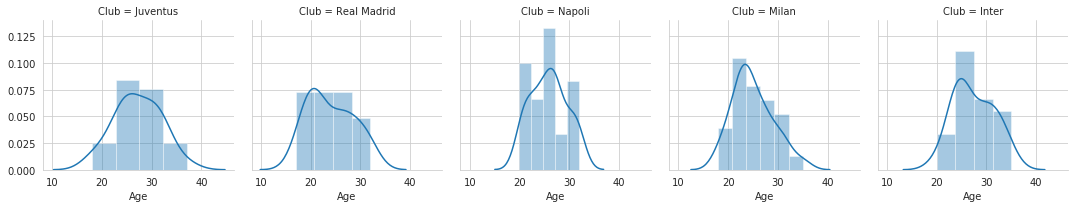

In [20]:
# group the data by football club
data_group_by_club = df.groupby('Club')
# find the mean of each attribute and select the Overall column
clubs_average_overall = data_group_by_club.mean()['Overall']
# sort the average overall in descending order and slice the top 5
top_clubs_top_5 = clubs_average_overall.sort_values(ascending = False)[:5]
# filter the big dataframe to include only players from top clubs
fifa18_top_5 = df.loc[df['Club'].isin(top_clubs_top_5.index)]
# create seaborn FacetGrid object, it will contain cell per club
g = sns.FacetGrid(fifa18_top_5, col='Club')
# In each column plot the age distrubtion of a club
g.map(sns.distplot, "Age")
plt.show()

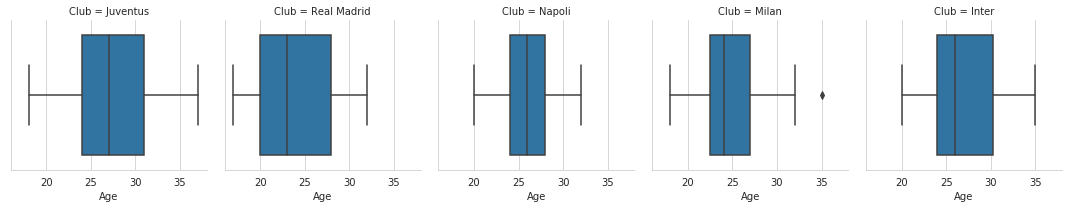

In [21]:
g = sns.FacetGrid(fifa18_top_5, col='Club')
g.map(sns.boxplot, "Age", order='')
plt.show()

player position predictor

In [22]:
Ori_df = pd.read_csv('../input/fifa19/data.csv')


In [23]:
Ori_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [24]:
columns_needed_rearranged = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'FKAccuracy', 'HeadingAccuracy', 'LongShots','Penalties', 'ShotPower', 'Volleys', 
       'ShortPassing', 'LongPassing',
       'Interceptions', 'Marking', 'SlidingTackle', 'StandingTackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'BallControl','Composure','Jumping', 
       'SprintSpeed', 'Positioning','Position']

In [25]:
df_new = Ori_df[columns_needed_rearranged]
df_new.fillna('',inplace = True)
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 30 columns):
Aggression         18207 non-null object
Crossing           18207 non-null object
Curve              18207 non-null object
Dribbling          18207 non-null object
Finishing          18207 non-null object
FKAccuracy         18207 non-null object
HeadingAccuracy    18207 non-null object
LongShots          18207 non-null object
Penalties          18207 non-null object
ShotPower          18207 non-null object
Volleys            18207 non-null object
ShortPassing       18207 non-null object
LongPassing        18207 non-null object
Interceptions      18207 non-null object
Marking            18207 non-null object
SlidingTackle      18207 non-null object
StandingTackle     18207 non-null object
Strength           18207 non-null object
Vision             18207 non-null object
Acceleration       18207 non-null object
Agility            18207 non-null object
Reactions          18207 non-n

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_new['Position'] = df_new['Position'].str.strip()
df_new = df_new[df_new['Position'] != 'GK']
df_new.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Aggression,Crossing,Curve,Dribbling,Finishing,FKAccuracy,HeadingAccuracy,LongShots,Penalties,ShotPower,...,Agility,Reactions,Stamina,Balance,BallControl,Composure,Jumping,SprintSpeed,Positioning,Position
0,48,84,93,97,95,94,70,94,75,85,...,91,95,72,95,96,96,68,86,94,RF
1,63,84,81,88,94,76,89,93,85,95,...,87,96,88,70,94,95,95,91,95,ST
2,56,79,88,96,87,87,62,82,81,80,...,96,94,81,84,95,94,61,90,89,LW
4,76,93,85,86,82,83,55,91,79,91,...,79,91,90,77,91,88,63,76,87,RCM
5,54,81,83,95,84,79,61,80,86,82,...,95,90,83,94,94,91,56,88,87,LF


In [27]:
df_new.isnull().values.any()

False

In [28]:
df_new

,Aggression,Crossing,Curve,Dribbling,Finishing,FKAccuracy,HeadingAccuracy,LongShots,Penalties,ShotPower,...,Agility,Reactions,Stamina,Balance,BallControl,Composure,Jumping,SprintSpeed,Positioning,Position
0,48,84,93,97,95,94,70,94,75,85,...,91,95,72,95,96,96,68,86,94,RF
1,63,84,81,88,94,76,89,93,85,95,...,87,96,88,70,94,95,95,91,95,ST
2,56,79,88,96,87,87,62,82,81,80,...,96,94,81,84,95,94,61,90,89,LW
4,76,93,85,86,82,83,55,91,79,91,...,79,91,90,77,91,88,63,76,87,RCM
5,54,81,83,95,84,79,61,80,86,82,...,95,90,83,94,94,91,56,88,87,LF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,46,34,30,42,38,34,40,38,43,43,...,60,49,40,76,43,45,55,57,39,CM
18203,47,23,32,39,52,20,52,42,43,41,...,38,40,43,52,40,42,47,39,46,ST
18204,32,25,38,45,40,27,46,45,55,45,...,50,47,55,58,44,41,60,69,48,ST
18205,33,44,34,51,50,32,39,34,50,64,...,52,21,40,71,52,46,42,60,44,RW


Text(22, 100, 'Mixed Attributes')

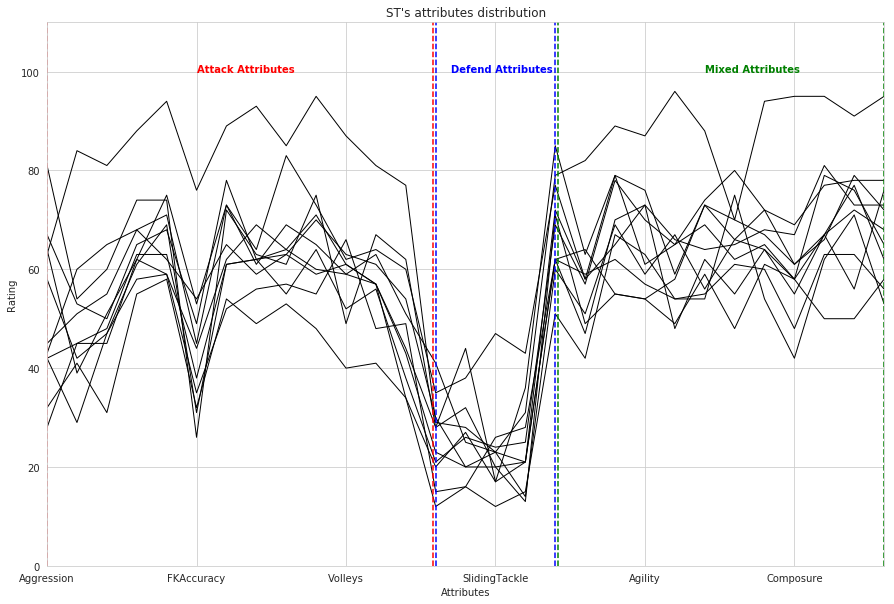

In [29]:
fig, ax = plt.subplots()
df_new_ST = df_new[df_new['Position'] == 'ST'].iloc[::200,:-1]
df_new_ST.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')